# CS 6330
## Final Project
## Distinguish Between Three Walkers
### Robert Burkhardt
### Dan Olson
### Rich Lukas
### 2/14/23

### Load Libraries

In [1]:
from collections import defaultdict as dd
from IPython.display import display, HTML
from matplotlib import pyplot as plt
from ModelAuto.Multicollinearity import handel_Multico_VIF
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from numpy import linalg as LA
from patsy import dmatrices
from pylab import *
from scipy import signal
from scipy.sparse import csr_matrix, find
from scipy.stats import chisquare
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import rand_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import random
import scipy as sci
import scipy.stats as stats
import seaborn as sns
import sklearn
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import statistics 
import statsmodels.api as sm
import tensorflow as tf
import time
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category
print("Libraries Loaded")

Libraries Loaded


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



## Create Data Frames

In [3]:
# !!! ONLY RUN THIS CELL ONCE
# RESTART NOTEBOOK IF RUN MORE THAN ONCE
notebook_path = os.path.abspath("")

## Experimenting with adding a low pass filter

In [4]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_bandpass_filter(data, cutoff_low, cuttoff_high, fs, order):
    normal_cutoff_low = cutoff_low / nyq
    normal_cutoff_high = cutoff_high / nyq    
    # Get the filter coefficients 
    b, a = butter(order, [normal_cutoff_low,normal_cutoff_high], btype='band', analog=False)
    y = filtfilt(b, a, data)
    return y

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)


## Create Frame with Three Walkers

In [5]:
#display(HTML("<script>$('div.cell.selected').children('div.output_wrapper').height(800);</script>"))
df_stairs = pd.DataFrame(columns=['time','gFx','gFy','gFz','wx','wy','wz','type'])
df_walking = pd.DataFrame(columns=['time','gFx','gFy','gFz','wx','wy','wz','type'])
df_walking1 = pd.DataFrame(columns=['time','gFx','gFy','gFz','wx','wy','wz','type'])
df_sitting = pd.DataFrame(columns=['time','gFx','gFy','gFz','wx','wy','wz','type'])
# time	gFx	gFy	gFz	wx	wy	wz

data_path = os.path.join(notebook_path, "data\\dan-raw")
os.chdir(data_path)

#os.chdir('./Stairs')
# Get the list of all files and directories
for x in os.listdir():
    if x.endswith("WalkingTrain.csv"):
        df = pd.read_csv(x)
        #df['time_elapsed'] = round(df['time']*1e6)
        df['type'] = 'D'
        df_stairs = df_stairs.append(df, ignore_index=True) 
#df_stairs = df_stairs.drop('Unnamed: 7', axis=1) 
df_stairs.reset_index(inplace = True,drop=True)
df_stairs = df_stairs.dropna(axis = 0, how ='any')
print(df_stairs.shape)

data_path = os.path.join(notebook_path, "data\\richard-raw\\Logs_walking_straight\\Cross")
os.chdir(data_path)

# Get the list of all files and directories
for x in os.listdir():
    if x.endswith("WalkingTrain.csv"): #Hard
        df = pd.read_csv(x)
        #df['time_elapsed'] = round(df['time']*1e6)
        df['type'] = 'L'
        df_walking = df_walking.append(df, ignore_index=True) 
r = df_walking.copy(deep = True).iloc[0::10]
r = pd.concat([r, r, r,r, r, r,r, r, r,r])
r.reset_index(inplace = True,drop=True)
df_walking = r.copy(deep = True)        

#df_walking = df_walking.drop('Unnamed: 7', axis=1) 
df_walking = df_walking.dropna(axis = 0, how ='any')
df_walking.reset_index(inplace = True,drop=True)

#df_walking1 = df_walking1.drop('Unnamed: 7', axis=1) 

print(df_walking.shape)
#print(df_walking1.shape)


data_path = os.path.join(notebook_path, "data\\george-raw\\Modified")
os.chdir(data_path)

# Get the list of all files and directories
for x in os.listdir():
    if x.endswith("WalkingTrain.csv"):
        df = pd.read_csv(x)
        #df['time_elapsed'] = (df['time'])
        df['type'] = 'G'
        df_sitting = df_sitting.append(df, ignore_index=True) 
#df_sitting = df_sitting.drop('Unnamed: 7', axis=1) 
df_sitting = df_sitting.dropna(axis = 0, how ='any')
df_sitting.reset_index(inplace = True,drop=True)
print(df_sitting.shape)

df_combined3 = pd.concat([df_walking, df_stairs, df_sitting])
df_combined3 = df_combined3.drop('time', axis=1)
#df_combined3 = df_combined3.drop('time_elapsed', axis=1)
df_combined3.reset_index(inplace = True,drop=True)

print("DataFrames Created")


#print(df_walking1.info())

(3597, 8)
(9080, 8)
(9998, 8)
DataFrames Created


##  Create Validation Data

In [6]:
#display(HTML("<script>$('div.cell.selected').children('div.output_wrapper').height(800);</script>"))
df_stairs = pd.DataFrame(columns=['time','gFx','gFy','gFz','wx','wy','wz','type'])
df_walking = pd.DataFrame(columns=['time','gFx','gFy','gFz','wx','wy','wz','type'])
df_sitting = pd.DataFrame(columns=['time','gFx','gFy','gFz','wx','wy','wz','type'])
# time	gFx	gFy	gFz	wx	wy	wz

data_path = os.path.join(notebook_path, "data\\dan-raw")
os.chdir(data_path)

#os.chdir('./Stairs')
# Get the list of all files and directories
for x in os.listdir():
    if x.endswith("walkingVal.csv"):
        df = pd.read_csv(x)
        #df['time_elapsed'] = round(df['time']*1e6)
        df['type'] = 'D'
        df_stairs = df_stairs.append(df, ignore_index=True) 
#df_stairs = df_stairs.drop('Unnamed: 7', axis=1) 
df_stairs.reset_index(inplace = True,drop=True)
df_stairs = df_stairs.dropna(axis = 0, how ='any')
print(df_stairs.shape)

data_path = os.path.join(notebook_path, "data\\richard-raw\\Logs_walking_straight\\Cross")
os.chdir(data_path)

# Get the list of all files and directories
for x in os.listdir():
    if x.endswith("walkingVal.csv"):
        df1 = pd.read_csv(x)
        #df['time_elapsed'] = round(df['time']*1e6)
        df1['type'] = 'L'
        df_walking = df_walking.append(df1, ignore_index=True) 
r = df_walking.copy(deep = True).iloc[0::10]
r = pd.concat([r, r, r,r, r, r,r, r, r,r])
r.reset_index(inplace = True,drop=True)
df_walking = r.copy(deep = True)  
#df_walking = df_walking.drop('Unnamed: 7', axis=1) 
df_walking = df_walking.dropna(axis = 0, how ='any')
df_walking.reset_index(inplace = True,drop=True)
print(df_walking.shape)
#print(df_walking.shape)


data_path = os.path.join(notebook_path, "data\\george-raw\\Modified")
os.chdir(data_path)
df = df.iloc[0:0]
# Get the list of all files and directories
for x in os.listdir():
    if x.endswith("walkingVal.csv"):
        df = pd.read_csv(x)
        #df['time_elapsed'] = (df['time'])
        df['type'] = 'G'
        df_sitting = df_sitting.append(df, ignore_index=True) 
#df_sitting = df_sitting.drop('Unnamed: 7', axis=1) 
df_sitting = df_sitting.dropna(axis = 0, how ='any')
df_sitting.reset_index(inplace = True,drop=True)
print(df_sitting.shape)

df_val = pd.concat([df_walking, df_stairs, df_sitting])
df_val = df_val.drop('time', axis=1)
#df_combined3 = df_combined3.drop('time_elapsed', axis=1)
df_val.reset_index(inplace = True,drop=True)
print(df_val.shape)
print("DataFrames Created")


#print(df_walking.info())

(1073, 8)
(1500, 8)
(998, 8)
(3571, 7)
DataFrames Created


## Short Test Data

In [7]:
#display(HTML("<script>$('div.cell.selected').children('div.output_wrapper').height(800);</script>"))
df_short = pd.DataFrame(columns=['time','gFx','gFy','gFz','wx','wy','wz','type'])

data_path = os.path.join(notebook_path, "data\\richard-raw\\Logs_walking_straight\\Cross")
os.chdir(data_path)

# Get the list of all files and directories
for x in os.listdir():
    if x.endswith("shortTest.csv"):
        df1 = pd.read_csv(x)
        df1['type'] = 'L'
        df_short = df_short.append(df1, ignore_index=True) 
df_short = df_short.dropna(axis = 0, how ='any')
df_short.reset_index(inplace = True,drop=True)

df_short = df_short.drop('time', axis=1)
df_short.reset_index(inplace = True,drop=True)
print(df_short.shape)
print("DataFrames Created")


#print(df_walking.info())

(99, 7)
DataFrames Created


## Create a Sliding Window of Input Vectors using a lagged input

## Create a 15 element input vector consisting of wx,wy,wz gz,gy,gz wxm1... gzm1... and EWMA valus of wx,wy,wz for alpha = 0.1

### Test Train Data

In [8]:
X = df_combined3.copy(deep = True)
#Xval = df_walking1.copy(deep = True)

if True:
    X['gFxm1'] = X['gFx']
    X['gFym1'] = X['gFy']
    X['gFzm1'] = X['gFz']

    X['gFxm1'].iloc[1:] = X['gFx'].iloc[0:-1]
    X['gFym1'].iloc[1:] = X['gFy'].iloc[0:-1]
    X['gFzm1'].iloc[1:] = X['gFz'].iloc[0:-1]

if True:
    X['wxm1'] = X['wx']
    X['wym1'] = X['wy']
    X['wzm1'] = X['wz']

    X['wxm1'].iloc[1:] = X['wx'].iloc[0:-1]
    X['wym1'].iloc[1:] = X['wy'].iloc[0:-1]
    X['wzm1'].iloc[1:] = X['wz'].iloc[0:-1]
    
if True:
    X['wxE'] = X['wx']
    X['wyE'] = X['wy']
    X['wzE'] = X['wz']
    
    X['gFxE'] = X['gFx']
    X['gFyE'] = X['gFy']
    X['gFzE'] = X['gFz'] 
    
    alpha = 0.1
    for i in range(1,len(X['wx'])):
        X['wxE'].loc[i] = round(alpha*X['wx'].loc[i] + (1-alpha)*X['wxE'].loc[i-1],4)
        X['wyE'].loc[i] = round(alpha*X['wy'].loc[i] + (1-alpha)*X['wyE'].loc[i-1],4)
        X['wzE'].loc[i] = round(alpha*X['wz'].loc[i] + (1-alpha)*X['wzE'].loc[i-1],4)
        
        X['gFxE'].loc[i] = round(alpha*X['gFx'].loc[i] + (1-alpha)*X['gFxE'].loc[i-1],4)
        X['gFyE'].loc[i] = round(alpha*X['gFy'].loc[i] + (1-alpha)*X['gFyE'].loc[i-1],4)
        X['gFzE'].loc[i] = round(alpha*X['gFz'].loc[i] + (1-alpha)*X['gFzE'].loc[i-1],4)
        

y = X.pop('type')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
print('\nThe size of the X_train is ' + str(X_train.shape[0]) + ' by ' + str(X_train.shape[1]) )
print('\nThe size of the X_test is ' + str(X_test.shape[0]) + ' by ' + str(X_test.shape[1]) )
scaler = preprocessing.StandardScaler().fit(X_train)
#min_max_scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



The size of the X_train is 17006 by 18

The size of the X_test is 5669 by 18


## Validation Data

In [9]:
X = df_val.copy(deep = True)

if True:
    X['gFxm1'] = X['gFx']
    X['gFym1'] = X['gFy']
    X['gFzm1'] = X['gFz']

    X['gFxm1'].iloc[1:] = X['gFx'].iloc[0:-1]
    X['gFym1'].iloc[1:] = X['gFy'].iloc[0:-1]
    X['gFzm1'].iloc[1:] = X['gFz'].iloc[0:-1]

if True:
    X['wxm1'] = X['wx']
    X['wym1'] = X['wy']
    X['wzm1'] = X['wz']

    X['wxm1'].iloc[1:] = X['wx'].iloc[0:-1]
    X['wym1'].iloc[1:] = X['wy'].iloc[0:-1]
    X['wzm1'].iloc[1:] = X['wz'].iloc[0:-1]
    
if True:
    X['wxE'] = X['wx']
    X['wyE'] = X['wy']
    X['wzE'] = X['wz']
    
    X['gFxE'] = X['gFx']
    X['gFyE'] = X['gFy']
    X['gFzE'] = X['gFz'] 
    
    alpha = 0.1
    for i in range(1,len(X['wx'])):
        X['wxE'].loc[i] = round(alpha*X['wx'].loc[i] + (1-alpha)*X['wxE'].loc[i-1],4)
        X['wyE'].loc[i] = round(alpha*X['wy'].loc[i] + (1-alpha)*X['wyE'].loc[i-1],4)
        X['wzE'].loc[i] = round(alpha*X['wz'].loc[i] + (1-alpha)*X['wzE'].loc[i-1],4)
        
        X['gFxE'].loc[i] = round(alpha*X['gFx'].loc[i] + (1-alpha)*X['gFxE'].loc[i-1],4)
        X['gFyE'].loc[i] = round(alpha*X['gFy'].loc[i] + (1-alpha)*X['gFyE'].loc[i-1],4)
        X['gFzE'].loc[i] = round(alpha*X['gFz'].loc[i] + (1-alpha)*X['gFzE'].loc[i-1],4)
        

y = X.pop('type')

#scaler = preprocessing.StandardScaler().fit(X)
#min_max_scaler = preprocessing.MinMaxScaler()
X = scaler.transform(X)
print('\nThe size of the X validation data is ' + str(X.shape[0]) + ' by ' + str(X.shape[1]) )

c:\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



The size of the X validation data is 3571 by 18


## Short Set of Data for Testing

In [10]:
Xs = df_short.copy(deep = True)

if True:
    Xs['gFxm1'] = Xs['gFx']
    Xs['gFym1'] = Xs['gFy']
    Xs['gFzm1'] = Xs['gFz']

    Xs['gFxm1'].iloc[1:] = Xs['gFx'].iloc[0:-1]
    Xs['gFym1'].iloc[1:] = Xs['gFy'].iloc[0:-1]
    Xs['gFzm1'].iloc[1:] = Xs['gFz'].iloc[0:-1]

if True:
    Xs['wxm1'] = Xs['wx']
    Xs['wym1'] = Xs['wy']
    Xs['wzm1'] = Xs['wz']

    Xs['wxm1'].iloc[1:] = Xs['wx'].iloc[0:-1]
    Xs['wym1'].iloc[1:] = Xs['wy'].iloc[0:-1]
    Xs['wzm1'].iloc[1:] = Xs['wz'].iloc[0:-1]
    
if True:
    Xs['wxE'] = Xs['wx']
    Xs['wyE'] = Xs['wy']
    Xs['wzE'] = Xs['wz']
    
    Xs['gFxE'] = Xs['gFx']
    Xs['gFyE'] = Xs['gFy']
    Xs['gFzE'] = Xs['gFz'] 
    
    alpha = 0.1
    for i in range(1,len(Xs['wx'])):
        Xs['wxE'].loc[i] = round(alpha*Xs['wx'].loc[i] + (1-alpha)*Xs['wxE'].loc[i-1],4)
        Xs['wyE'].loc[i] = round(alpha*Xs['wy'].loc[i] + (1-alpha)*Xs['wyE'].loc[i-1],4)
        Xs['wzE'].loc[i] = round(alpha*Xs['wz'].loc[i] + (1-alpha)*Xs['wzE'].loc[i-1],4)
        
        Xs['gFxE'].loc[i] = round(alpha*Xs['gFx'].loc[i] + (1-alpha)*Xs['gFxE'].loc[i-1],4)
        Xs['gFyE'].loc[i] = round(alpha*Xs['gFy'].loc[i] + (1-alpha)*Xs['gFyE'].loc[i-1],4)
        Xs['gFzE'].loc[i] = round(alpha*Xs['gFz'].loc[i] + (1-alpha)*Xs['gFzE'].loc[i-1],4)
        

ys = Xs.pop('type')

#scaler = preprocessing.StandardScaler().fit(Xs)
#min_maXs_scaler = preprocessing.MinMaXsScaler()
Xs = scaler.transform(Xs)
print('\nThe size of the Xs validation data is ' + str(Xs.shape[0]) + ' by ' + str(Xs.shape[1]) )


The size of the Xs validation data is 99 by 18


c:\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## LR Model

Score:  1.0
Accuracy:  0.9671899805962251
Balanced Accuracy:  0.9456040580249878
f1_score 0.9668649103174343
     D     L     G
D  778     0   121
L    1  2499     0
G   64     0  2206


c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


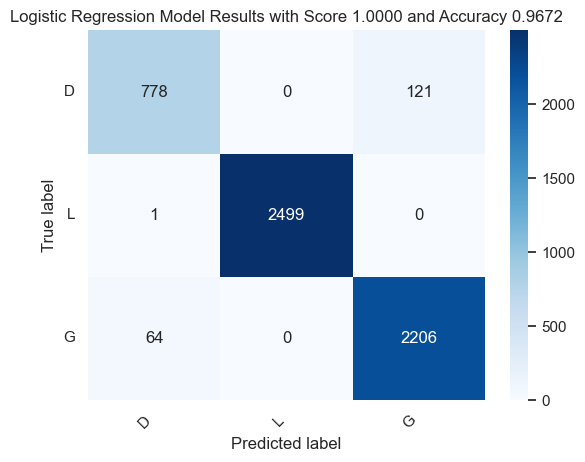

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto').fit(X_train, y_train)
yhat = LR.predict(X_test )

Score_model = round(LR.score(X_test,yhat), 4)
Accuracy_model = round(accuracy_score(y_test, yhat),4)
print("Score: ", round(LR.score(X_test,yhat), 4))
print("Accuracy: ", accuracy_score(y_test, yhat))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, yhat))
print('f1_score', f1_score(y_test, yhat,average = 'weighted'))

conmat = confusion_matrix(y_test, yhat)
val = np.mat(conmat) 
classnames = list(set(y_test))
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )

print(df_cm)

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues",fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
Score_model = round(LR.score(X_test,yhat), 4)
Accuracy_model = round(accuracy_score(y_test, yhat),4)
plt.title('Logistic Regression Model Results with Score %5.4f and Accuracy %5.4f' % (Score_model, Accuracy_model))
plt.show() 



## LR Validation

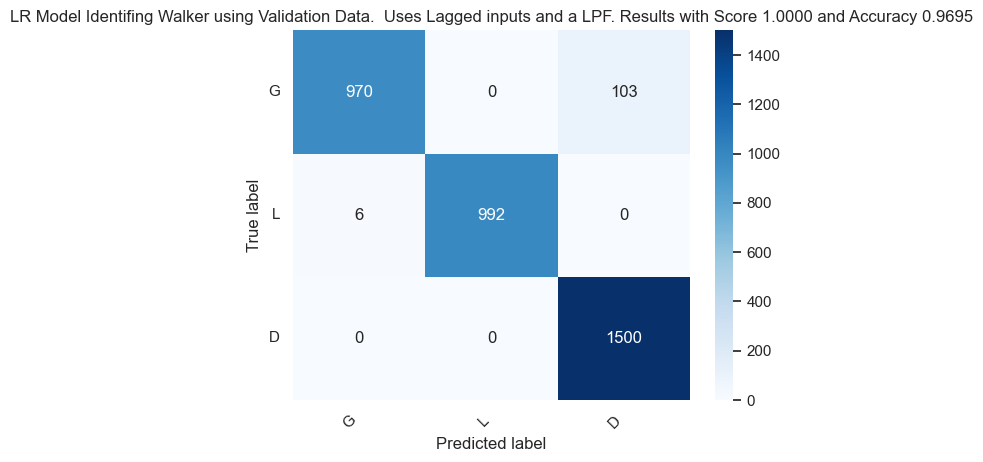

In [12]:
yhat = LR.predict(X)
conmat = confusion_matrix(y, yhat)
val = np.mat(conmat) 
classnames = list(set(y_test))
classnames.reverse()
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )

#print(df_cm)

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues",fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
Score_model = round(LR.score(X,yhat), 4)
Accuracy_model = round(accuracy_score(y, yhat),4)
plt.title('LR Model Identifing Walker using Validation Data.  Uses Lagged inputs and a LPF. Results with Score %5.4f and Accuracy %5.4f' % (Score_model, Accuracy_model))
plt.show() 

## SVM Model

Score:  1.0
Accuracy:  0.9451402363732581
Balanced Accuracy:  0.8997041431252543
f1_score 0.9431155966036598
     D     L     G
D  655     7   237
L    0  2499     1
G   66     0  2204


c:\python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


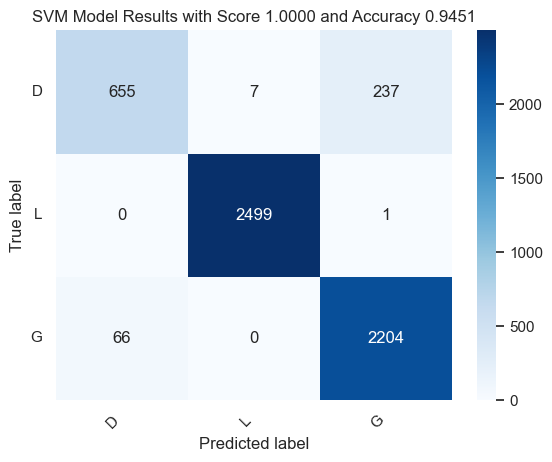

In [13]:
from sklearn import svm

SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
yhat = SVM.predict(X_test )
print("Score: ", round(SVM.score(X_test,yhat), 4))
print("Accuracy: ", accuracy_score(y_test, yhat))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, yhat))
print('f1_score', f1_score(y_test, yhat,average = 'weighted'))
conmat = confusion_matrix(y_test, yhat)
val = np.mat(conmat) 
classnames = list(set(y_test))
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )

print(df_cm)

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues",fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
Score_model = round(SVM.score(X_test,yhat), 4)
Accuracy_model = round(accuracy_score(y_test, yhat),4)
plt.title('SVM Model Results with Score %5.4f and Accuracy %5.4f' % (Score_model, Accuracy_model))
#plt.title('SVM Model Results')
plt.show() 




## SVM Validation

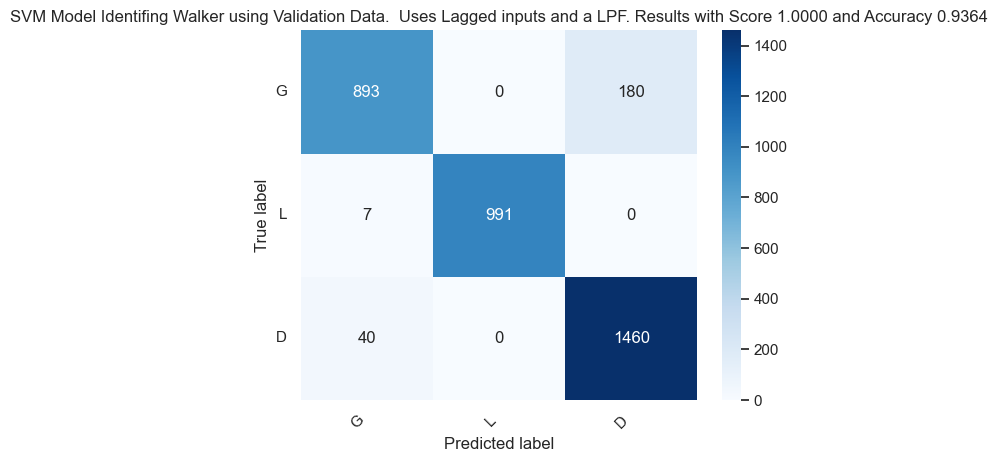

In [14]:
yhat = SVM.predict(X)
conmat = confusion_matrix(y, yhat)
val = np.mat(conmat) 
classnames = list(set(y_test))
classnames.reverse()
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )

#print(df_cm)

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues",fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
Score_model = round(SVM.score(X,yhat), 4)
Accuracy_model = round(accuracy_score(y, yhat),4)
plt.title('SVM Model Identifing Walker using Validation Data.  Uses Lagged inputs and a LPF. Results with Score %5.4f and Accuracy %5.4f' % (Score_model, Accuracy_model))
plt.show() 

## Random Forest

Score:  1.0
Accuracy:  0.8869289116246252
Balanced Accuracy:  0.7636991690881857
f1_score 0.8629919324068431
     D     L     G
D  264    20   615
L    2  2498     0
G    4     0  2266


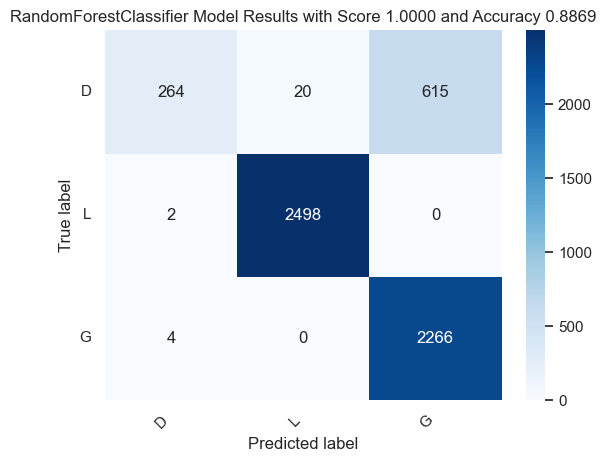

In [15]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)
yhat = RF.predict(X_test)
print("Score: ", round(RF.score(X_test,yhat), 4))
print("Accuracy: ", accuracy_score(y_test, yhat))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, yhat))
print('f1_score', f1_score(y_test, yhat,average = 'weighted'))
conmat = confusion_matrix(y_test, yhat)
val = np.mat(conmat) 
classnames = list(set(y_test))
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )

print(df_cm)

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues",fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
Score_model = round(RF.score(X_test,yhat), 4)
Accuracy_model = round(accuracy_score(y_test, yhat),4)
plt.title('RandomForestClassifier Model Results with Score %5.4f and Accuracy %5.4f' % (Score_model, Accuracy_model))
#plt.title('RandomForestClassifier Model Results')
plt.show() 




## Random Forest Validation

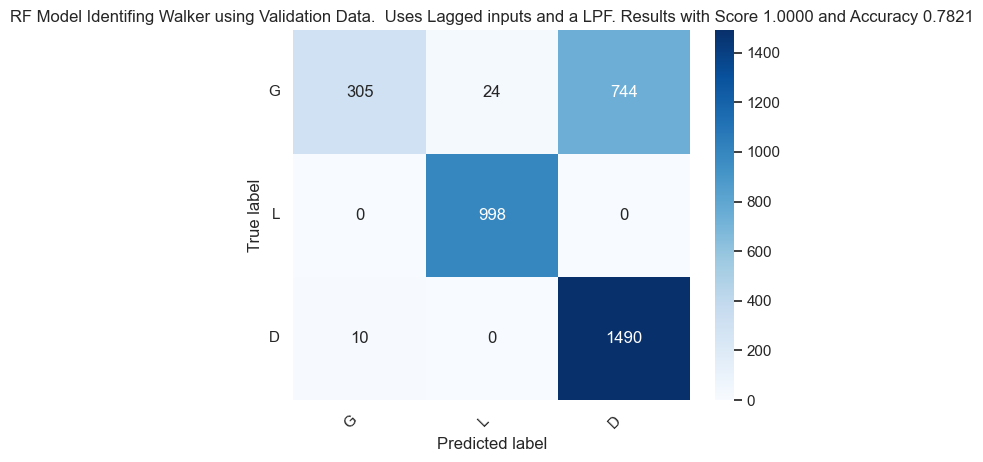

In [16]:
yhat = RF.predict(X)
conmat = confusion_matrix(y, yhat)
val = np.mat(conmat) 
classnames = list(set(y_test))
classnames.reverse()
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )

#print(df_cm)

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues",fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
Score_model = round(RF.score(X,yhat), 4)
Accuracy_model = round(accuracy_score(y, yhat),4)
plt.title('RF Model Identifing Walker using Validation Data.  Uses Lagged inputs and a LPF. Results with Score %5.4f and Accuracy %5.4f' % (Score_model, Accuracy_model))
plt.show() 

## Decision Tree Classifier

Score:  1.0
Accuracy:  0.9984124184159464
Balanced Accuracy:  0.9969004078605859
f1_score 0.9984105394426007
     D     L     G
D  891     0     8
L    1  2499     0
G    0     0  2270


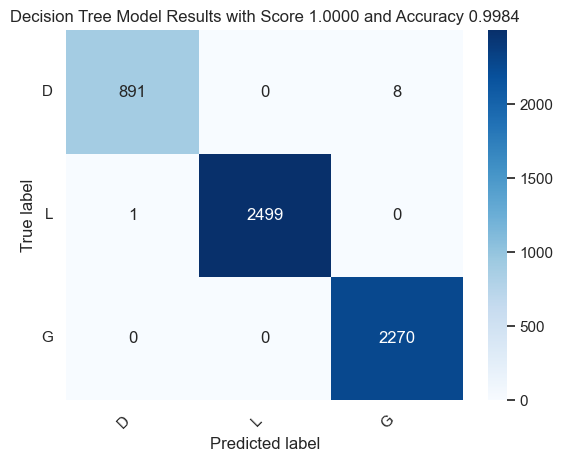

In [17]:
CLF = DecisionTreeClassifier()
CLF.fit(X_train, y_train)
yhat = CLF.predict(X_test)
print("Score: ", round(CLF.score(X_test,yhat), 4))
print("Accuracy: ", accuracy_score(y_test, yhat))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, yhat))
print('f1_score', f1_score(y_test, yhat,average = 'weighted'))
conmat = confusion_matrix(y_test, yhat)
val = np.mat(conmat) 
classnames = list(set(y_test))
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )

print(df_cm)

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues",fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
Score_model = round(CLF.score(X_test,yhat), 4)
Accuracy_model = round(accuracy_score(y_test, yhat),4)
plt.title('Decision Tree Model Results with Score %5.4f and Accuracy %5.4f' % (Score_model, Accuracy_model))
#plt.title('RandomForestClassifier Model Results')
plt.show() 




##  Decision Tree Validation

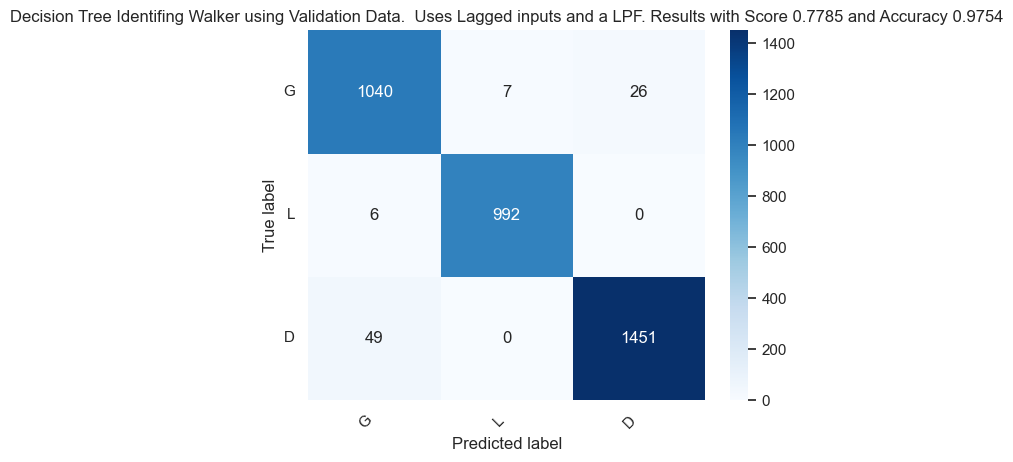

In [18]:
yhat = CLF.predict(X)
conmat = confusion_matrix(y, yhat)
val = np.mat(conmat) 
classnames = list(set(y_test))
classnames.reverse()
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )

#print(df_cm)

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues",fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
Score_model = round(RF.score(X,yhat), 4)
Accuracy_model = round(accuracy_score(y, yhat),4)
plt.title('Decision Tree Identifing Walker using Validation Data.  Uses Lagged inputs and a LPF. Results with Score %5.4f and Accuracy %5.4f' % (Score_model, Accuracy_model))
plt.show() 

## K Nearest Neighbors Classifier

Score:  0.9984
Accuracy:  0.9984124184159464
Balanced Accuracy:  0.9969004078605859
f1_score 0.9984105394426007
     D     L     G
D  891     0     8
L    1  2499     0
G    0     0  2270


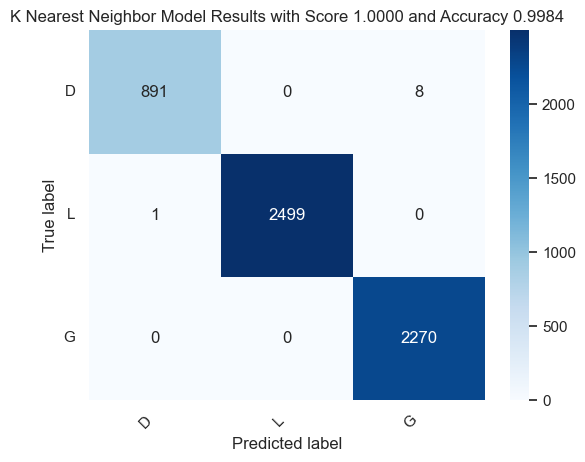

In [19]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
yhat = CLF.predict(X_test)
print("Score: ", round(neigh.score(X_test,yhat), 4))
print("Accuracy: ", accuracy_score(y_test, yhat))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, yhat))
print('f1_score', f1_score(y_test, yhat,average = 'weighted'))
conmat = confusion_matrix(y_test, yhat)
val = np.mat(conmat) 
classnames = list(set(y_test))
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )

print(df_cm)

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues",fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
Score_model = round(CLF.score(X_test,yhat), 4)
Accuracy_model = round(accuracy_score(y_test, yhat),4)
plt.title('K Nearest Neighbor Model Results with Score %5.4f and Accuracy %5.4f' % (Score_model, Accuracy_model))
#plt.title('RandomForestClassifier Model Results')
plt.show() 




## K Nearest Neighbor Validation

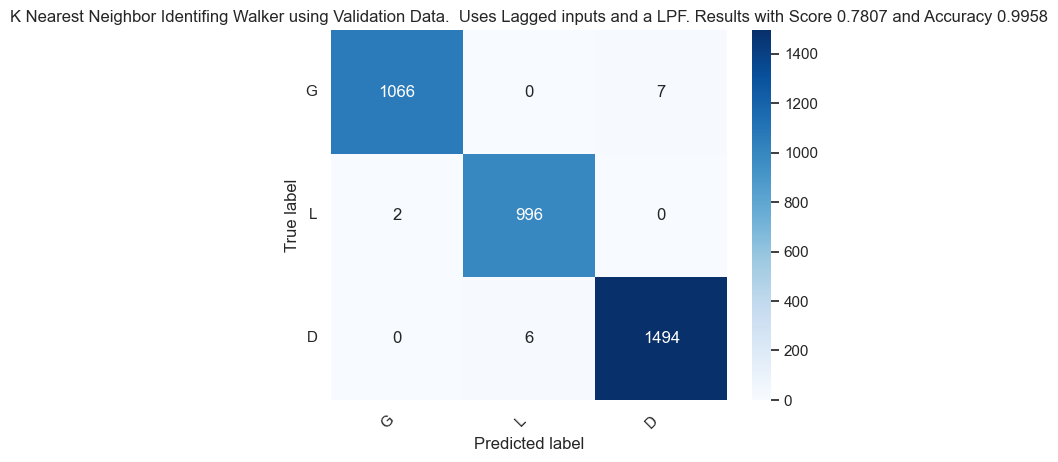

In [20]:
yhat = neigh.predict(X)
conmat = confusion_matrix(y, yhat)
val = np.mat(conmat) 
classnames = list(set(y_test))
classnames.reverse()
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )

#print(df_cm)

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues",fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
Score_model = round(RF.score(X,yhat), 4)
Accuracy_model = round(accuracy_score(y, yhat),4)
plt.title('K Nearest Neighbor Identifing Walker using Validation Data.  Uses Lagged inputs and a LPF. Results with Score %5.4f and Accuracy %5.4f' % (Score_model, Accuracy_model))
plt.show() 

## MLP Classifier Model

Score:  0.9501
Accuracy:  0.9929440818486506
Balanced Accuracy:  0.9867497918228607
f1_score 0.9929032949348798


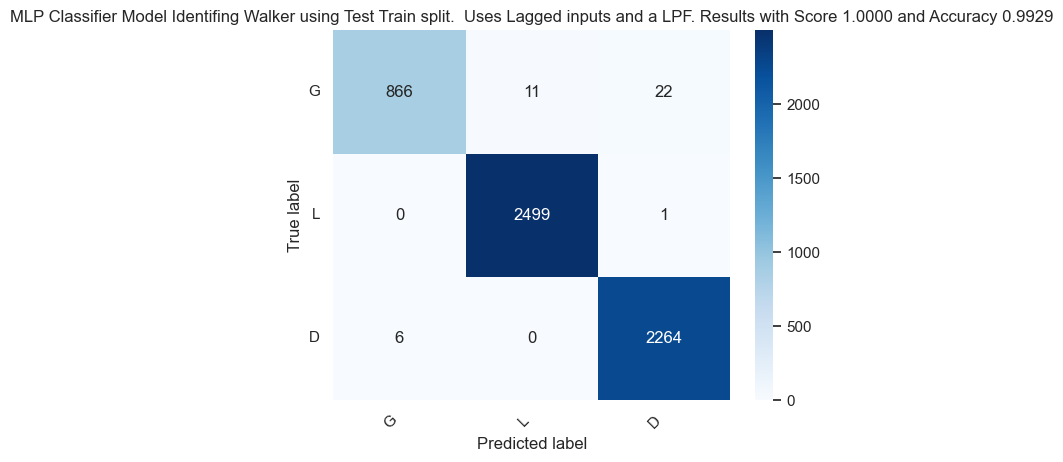

In [21]:
from sklearn.neural_network import MLPClassifier
# {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (125,), 'learning_rate': 'constant', random_state=1,'solver': 'lbfgs'}
NN = MLPClassifier(activation = "relu", solver='sgd', alpha=0.0001, hidden_layer_sizes=(100, ), learning_rate = "constant", max_iter=100, shuffle = True, early_stopping = True)
NN.fit(X_train, y_train)
yhat = NN.predict(X_test)
print("Score: ", round(SVM.score(X_test,yhat), 4))
print("Accuracy: ", accuracy_score(y_test, yhat))
print("Balanced Accuracy: ", balanced_accuracy_score(y_test, yhat))
print('f1_score', f1_score(y_test, yhat,average = 'weighted'))
conmat = confusion_matrix(y_test, yhat)
val = np.mat(conmat) 
classnames = list(set(y_test))
classnames.reverse()
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )

#print(df_cm)

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues",fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
Score_model = round(NN.score(X_test,yhat), 4)
Accuracy_model = round(accuracy_score(y_test, yhat),4)
plt.title('MLP Classifier Model Identifing Walker using Test Train split.  Uses Lagged inputs and a LPF. Results with Score %5.4f and Accuracy %5.4f' % (Score_model, Accuracy_model))
plt.show() 

## MLP Classifier Validation

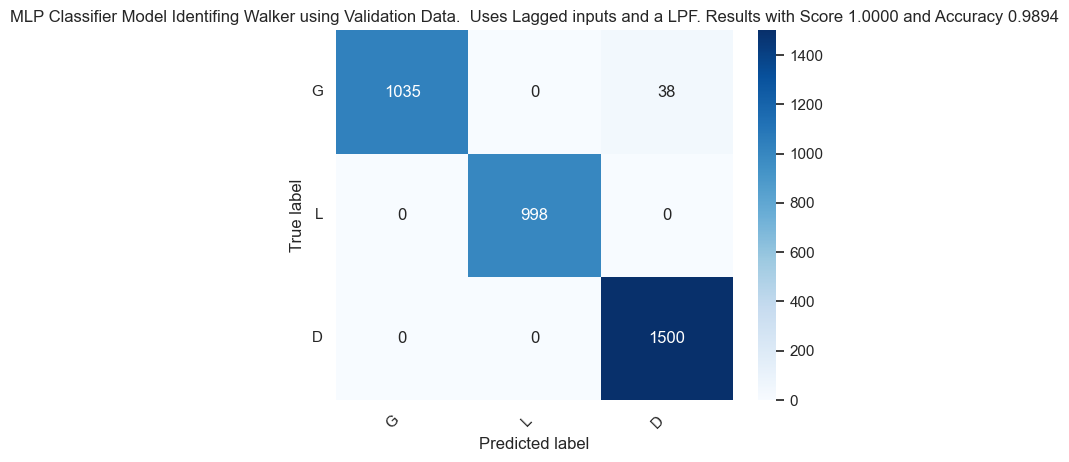

In [22]:
yhat = NN.predict(X)
conmat = confusion_matrix(y, yhat)
val = np.mat(conmat) 
classnames = list(set(y_test))
classnames.reverse()
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )

#print(df_cm)

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues",fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
Score_model = round(NN.score(X,yhat), 4)
Accuracy_model = round(accuracy_score(y, yhat),4)
plt.title('MLP Classifier Model Identifing Walker using Validation Data.  Uses Lagged inputs and a LPF. Results with Score %5.4f and Accuracy %5.4f' % (Score_model, Accuracy_model))
plt.show() 